In [3]:
import os
import numbers
import numpy as np
from collections import defaultdict

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=2)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

import torch
from torchvision import datasets, transforms
from torchvision import utils 
from imgaug.augmenters import GaussianBlur as iGauss
from kornia.filters import GaussianBlur2d as kGauss

# Load data

In [5]:
data = datasets.MNIST(
    ".",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

# Smooth

iaa

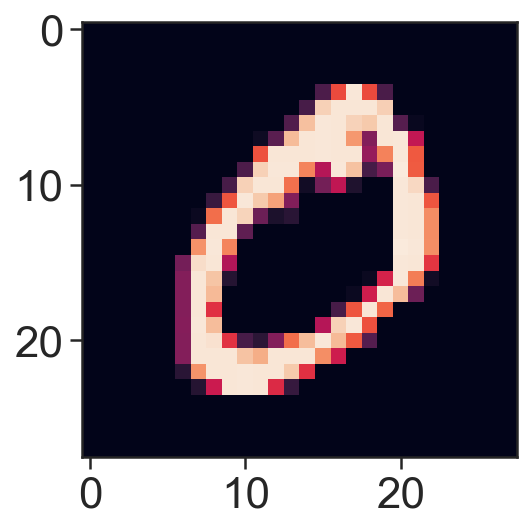

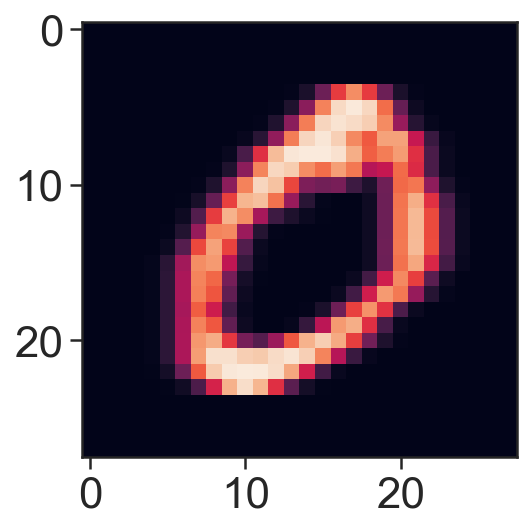

In [33]:
smoother = iGauss(sigma=0.9)

n = 1
x = data.data[n,]
x_smooth = torch.Tensor(smoother.augment_image(x.view(-1, 784)))
utils.save_image(x, "ref.png")
utils.save_image(x_smooth.view(-1, 28, 28), "smooth.png")

plt.imshow(x)
plt.show()

plt.imshow(x_smooth.view(28, 28))
plt.show()

kornia

In [73]:
smoother = kGauss(sigma=(0.6, 0.6), kernel_size=(3, 3), border_type='constant')

n = 1
x = data.data[n:10,]
x = x.float().view(-1,1,28*28,1)
print(x.shape)
x_smooth = smoother(x)

utils.save_image(x.squeeze().view(-1, 28, 28), "ref.png")
utils.save_image(x_smooth.view(-1, 28, 28), "smooth.png")

plt.imshow(x.squeeze().view(28, 28))
plt.show()

plt.imshow(x_smooth.view(28, 28))
plt.show()

torch.Size([9, 1, 784, 1])


TypeError: Cannot handle this data type

In [69]:
x.shape

torch.Size([1, 1, 784, 1])